# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1dZrxWFxSO8qLXdLmnMC0sQi0j2VrLuz0#scrollTo=LfiFE_WOqIDu

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [1]:
import io
import os
import shutil
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders

In [5]:
data_dir = "/content/drive/My Drive/Colab Notebooks/MIE1517/Labs/Lab 2 - Convolutional Neural Networks/Lab_3b_Gesture_Dataset"

splitfolders.ratio(data_dir, output="output", seed=1337, ratio=(0.72, 0.18,0.1))

Copying files: 2431 files [00:24, 98.03 files/s] 


In [6]:
data_dir_small = "/content/output/test"

splitfolders.ratio(data_dir_small, output="output_small", seed=1337, ratio=(0.72, 0.18,0.1))

Copying files: 252 files [00:00, 5820.80 files/s]


In [7]:
split_data_dir =  '/content/output/'

train_dir = os.path.join(split_data_dir, 'train/')
val_dir = os.path.join(split_data_dir, 'val/')
test_dir = os.path.join(split_data_dir, 'test/')

In [8]:
split_data_dir_small =  '/content/output_small/'

train_dir_small = os.path.join(split_data_dir_small, 'train/')
val_dir_small = os.path.join(split_data_dir_small, 'val/')
test_dir_small = os.path.join(split_data_dir_small, 'test/')

In [9]:
data_transform = transforms.Compose([transforms.Resize([224, 224]), transforms.CenterCrop(224), transforms.ToTensor()])
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

In [10]:
train_data_small = datasets.ImageFolder(train_dir_small, transform=data_transform)
val_data_small = datasets.ImageFolder(val_dir_small, transform=data_transform)
test_data_small = datasets.ImageFolder(test_dir_small, transform=data_transform)

In [11]:
# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num testing images: ', len(test_data))

Num training images:  1745
Num validation images:  434
Num testing images:  252


In [12]:
# print out some data stats
print('Num training images in small dataset: ', len(train_data_small))
print('Num validation images in small dataset: ', len(val_data_small))
print('Num testing images in small dataset: ', len(test_data_small))

Num training images in small dataset:  178
Num validation images in small dataset:  44
Num testing images in small dataset:  30


I split the data by using the split-folders package, and the ratio among train, validation and test data 0.72:0.18:0.1,

### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [13]:
class GestureClassifier(nn.Module):
    def __init__(self):
        super(GestureClassifier, self).__init__()
        self.name = 'GestureClassifier'
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10*53*53, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

My neural netwrok have 6 layers in total, which includes 2 convolutional layers, 2 max-pooling layers and 2 fully connected linear layers. The convolutional layers and max-pooling layers can quickly downsize the information and extract the useful features. I use output 5 channels in the first convolutional layer to extract the key features and increase to 10 channels in the second convolutional layer to enlarge the extracted features. The activitation I choose for the 1st fully connected linear layer is Relu function to prevent exponential growth in computation. And 32 nodes for the 1st fully connected linear layer to capature the complexities, and 9 nodes for the 2nd fully connected layer to generate the class result.

### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [14]:
def get_accuracy(model, data_loader):
  correct = 0
  total = 0
  for imgs, labels in data_loader:
  
    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #############################################
    
    output = model(imgs)
    
    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
  return correct / total

In [15]:
def save_checkpoint(model, batch_size, lr, epoch, train_small = False):
  if train_small:
    model_path = "{}_{}_{}_{}_small".format(model.name, batch_size, lr, epoch)
  else:
    model_path = "{}_{}_{}_{}".format(model.name, batch_size, lr, epoch)
  torch.save(model, model_path)
  print('Checkpoint of {} has been stored successfully!',format(model_path))

In [16]:
def train(model, opt, batch_size = 64, learning_rate=0.01, epochs=30, train_small = False):

  if (train_small):
    train_loader = torch.utils.data.DataLoader(train_data_small, batch_size=batch_size, 
                                           num_workers=0, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data_small, batch_size=batch_size, 
                                          num_workers=0, shuffle=True)
  else:
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=0, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=0, shuffle=True)

  criterion = nn.CrossEntropyLoss()

  optimizer = opt(model.parameters(), lr=learning_rate)
    
  iters, losses, train_acc, val_acc = [], [], [], []

  n = 0 # the number of iterations
  for epoch in range(epochs):
    for imgs, labels in tqdm(iter(train_loader)):

      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################
  
      output = model(imgs) 
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # save the current training information
    iters.append(n)
    losses.append(float(loss)/batch_size)
    train_acc.append(get_accuracy(model, train_loader))
    val_acc.append(get_accuracy(model, val_loader))
    n += 1
      
    if ((epoch+1) % 10 == 0):
      save_checkpoint(model, batch_size, learning_rate, epoch+1, train_small)

  # plotting
  plt.title("Training Curve")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Training Curve")
  plt.plot(iters, train_acc, label="Train")
  plt.plot(iters, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Training Accuracy")
  plt.legend(loc='best')
  plt.show()

  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))

I choose to make optimizer as a hyperparameter, so I can use different optimizer while facing different scale of data. I also choose cross-entropy as my loss function to help find the optimal point faster by providing potentially bigger derivative.

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

CUDA is not available.  Training on CPU ...


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_10_small


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_20_small


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_30_small


100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_40_small


100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_50_small


100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_60_small


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_70_small


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_80_small


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_90_small


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Checkpoint of {} has been stored successfully! GestureClassifier_256_0.001_100_small


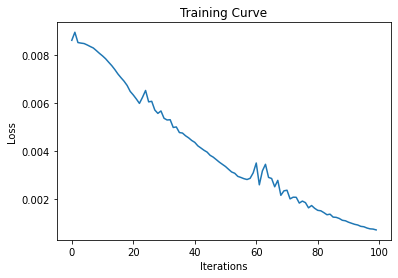

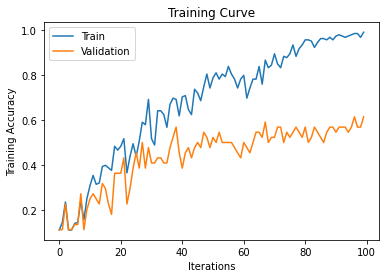

Final Training Accuracy: 0.9887640449438202
Final Validation Accuracy: 0.6136363636363636


In [17]:
use_cuda = True
model = GestureClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(model, opt=optim.Adam, batch_size=256, learning_rate=0.001, epochs=100, train_small = True)

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

Batch size, learning rate, optimizer

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

CUDA is available!  Training on GPU ...


100%|██████████| 14/14 [00:03<00:00,  3.83it/s]


Checkpoint of {} has been stored successfully! GestureClassifier_128_0.001_10


100%|██████████| 14/14 [00:03<00:00,  3.81it/s]


Checkpoint of {} has been stored successfully! GestureClassifier_128_0.001_20


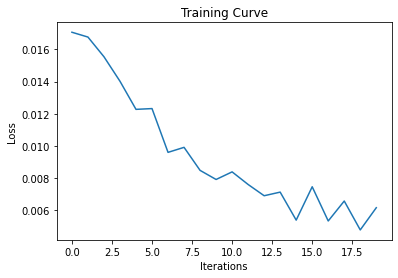

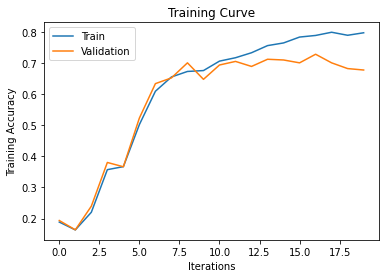

Final Training Accuracy: 0.7971346704871061
Final Validation Accuracy: 0.6774193548387096


In [18]:
use_cuda = True
model = GestureClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(model, opt=optim.Adam, batch_size=128, learning_rate=0.001, epochs=20)

CUDA is available!  Training on GPU ...


100%|██████████| 14/14 [00:03<00:00,  3.79it/s]


Checkpoint of {} has been stored successfully! GestureClassifier_128_0.001_10


100%|██████████| 14/14 [00:03<00:00,  3.80it/s]


Checkpoint of {} has been stored successfully! GestureClassifier_128_0.001_20


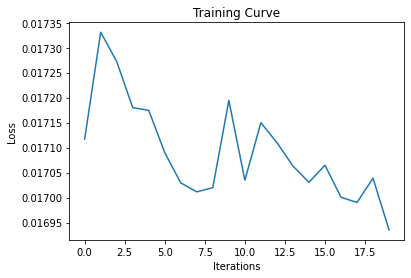

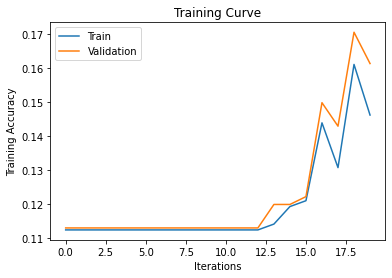

Final Training Accuracy: 0.14613180515759314
Final Validation Accuracy: 0.16129032258064516


In [19]:
use_cuda = True
model = GestureClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(model, opt=optim.SGD, batch_size=128, learning_rate=0.001, epochs=20)

CUDA is available!  Training on GPU ...


100%|██████████| 14/14 [00:04<00:00,  3.34it/s]


Checkpoint of {} has been stored successfully! GestureClassifier_128_0.001_10


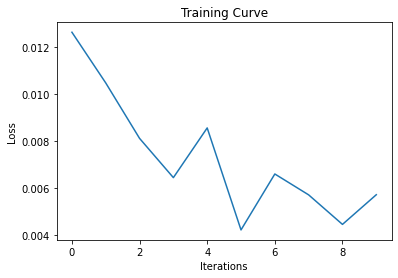

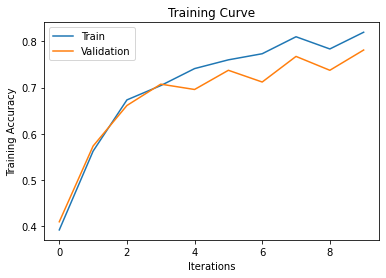

Final Training Accuracy: 0.8194842406876791
Final Validation Accuracy: 0.7811059907834101


In [20]:
use_cuda = True
model = GestureClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(model, opt=optim.Adam, batch_size=128, learning_rate=0.001, epochs=10)

CUDA is available!  Training on GPU ...


100%|██████████| 28/28 [00:04<00:00,  6.47it/s]


Checkpoint of {} has been stored successfully! GestureClassifier_64_0.001_10


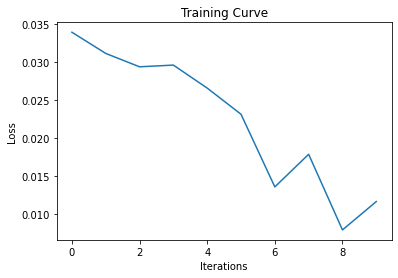

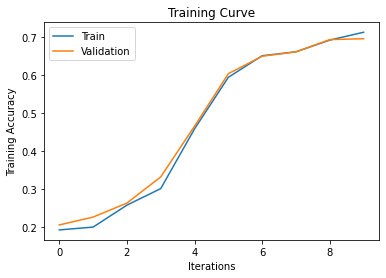

Final Training Accuracy: 0.712893982808023
Final Validation Accuracy: 0.695852534562212


In [30]:
use_cuda = True
model = GestureClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(model, opt=optim.Adam, batch_size=64, learning_rate=0.001, epochs=10)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

The best model I have is the one uses adam optimizer, 128 batch size, 0.001 learning rate and 10 epochs. Adam optimizer shows better optimization than SGD optimizer by stably increasing the accuracy. And smaller batch size 64 doesn't show any huge improvment in accuracy. Among all the models I trained, this one has both highest training accuracy and validation accuracy, and also the smallest gap between training accuracy and validation accuracy, which prevents the overfitting problem. 

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [25]:
model = GestureClassifier()
model = torch.load('/content/GestureClassifier_128_0.001_10')

test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

print("Final Testing Accuracy: {}".format(get_accuracy(model, test_loader)))

Final Testing Accuracy: 0.7261904761904762


### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [18]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
# features = alexnet.features(img)

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [19]:
def save_alex_featured_imgs(dst_dataset_dir = 'AlexNet/', target_dataset_dir = 'normal'):
  if target_dataset_dir == 'normal':
    dataset_dir = "/content/drive/My Drive/Colab Notebooks/MIE1517/Labs/Lab 2 - Convolutional Neural Networks/Lab_3b_Gesture_Dataset"
  elif target_dataset_dir == 'self':
    dataset_dir = '/content/drive/My Drive/Colab Notebooks/MIE1517/Labs/Lab 2 - Convolutional Neural Networks/Li_1007911994'

  if not os.path.isdir(dst_dataset_dir):
    os.mkdir(dst_dataset_dir)
  else:
    shutil.rmtree(dst_dataset_dir)
    os.mkdir(dst_dataset_dir)


  target_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

  for i in target_classes:
    if not os.path.isdir(dst_dataset_dir+i):
      os.mkdir(dst_dataset_dir+i)

  alexnet = torchvision.models.alexnet(pretrained=True)

  transform = transforms.Compose([transforms.Resize([224, 224]), 
                    transforms.CenterCrop(224), 
                    transforms.ToTensor()])

  dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

  data_loader = torch.utils.data.DataLoader(dataset, batch_size=1)

  for idx, (img, label) in enumerate(data_loader):

    new_img = alexnet.features(img)

    label_str = target_classes[label[0].detach().numpy()]

    torch.save(new_img[0], dst_dataset_dir + label_str + '/img_{}_{}.pt'.format(idx, label_str))

    buffer = io.BytesIO()
    torch.save(new_img, buffer)

  return None

In [20]:
save_alex_featured_imgs()

### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
# output = model(features)
# prob = F.softmax(output)

In [21]:
class AlexNetModel(nn.Module):

    def __init__(self):
        super(AlexNetModel, self).__init__()
        self.name = 'AlexNetModel'
        self.conv1 = nn.Conv2d(256, 10, 3) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(10*2*2, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 10*2*2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

My neural netwrok have 4 layers in total, which includes 1 convolutional layer, 1 max-pooling layer and 2 fully connected linear layers. The convolutional layers and max-pooling layers can quickly downsize the information and extract the useful features. I use output 10 channels in the convolutional layer to enlarge the extracted features from AlexNet. The activitation I choose for the 1st fully connected linear layer is Relu function to prevent exponential growth in computation. And 32 nodes for the 1st fully connected linear layer to capature the complexities, and 9 nodes for the 2nd fully connected layer to generate the class result.

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
# tensor = torch.from_numpy(tensor.detach().numpy())

In [22]:
data_dir_alex = "/content/AlexNet"

splitfolders.ratio(data_dir_alex, output="output_AlexNet", seed=1337, ratio=(0.72, 0.18,0.1))

Copying files: 2431 files [00:00, 5450.87 files/s]


In [23]:
split_data_dir_alex =  '/content/output_AlexNet/'

train_dir_alex = os.path.join(split_data_dir_alex, 'train/')
val_dir_alex = os.path.join(split_data_dir_alex, 'val/')
test_dir_alex = os.path.join(split_data_dir_alex, 'test/')

In [24]:
train_data_alex = torchvision.datasets.DatasetFolder(root=train_dir_alex, loader=torch.load, extensions=('.pt'))
val_data_alex = torchvision.datasets.DatasetFolder(root=val_dir_alex, loader=torch.load, extensions=('.pt'))
test_data_alex = torchvision.datasets.DatasetFolder(root=test_dir_alex, loader=torch.load, extensions=('.pt'))

In [25]:
def train_alex(model, opt, batch_size = 64, learning_rate=0.01, epochs=30, train_small = False):

  train_loader_alex = torch.utils.data.DataLoader(train_data_alex, batch_size=batch_size, 
                                           num_workers=0, shuffle=True)
  val_loader_alex = torch.utils.data.DataLoader(val_data_alex, batch_size=batch_size, 
                                          num_workers=0, shuffle=True)

  criterion = nn.CrossEntropyLoss()

  optimizer = opt(model.parameters(), lr=learning_rate)
    
  iters, losses, train_acc, val_acc = [], [], [], []

  n = 0 # the number of iterations
  for epoch in range(epochs):
    for imgs, labels in tqdm(iter(train_loader_alex)):

      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################
  
      output = model(imgs) 
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # save the current training information
    iters.append(n)
    losses.append(float(loss)/batch_size)
    train_acc.append(get_accuracy(model, train_loader_alex)) # compute training accuracy 
    val_acc.append(get_accuracy(model, val_loader_alex))  # compute validation accuracy
    n += 1
      
    if ((epoch+1) % 10 == 0):
      save_checkpoint(model, batch_size, learning_rate, epoch+1, train_small)

  # plotting
  plt.title("Training Curve")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Training Curve")
  plt.plot(iters, train_acc, label="Train")
  plt.plot(iters, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Training Accuracy")
  plt.legend(loc='best')
  plt.show()

  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is not available.  Training on CPU ...


100%|██████████| 14/14 [00:00<00:00, 27.28it/s]


Checkpoint of {} has been stored successfully! AlexNetModel_128_0.001_10


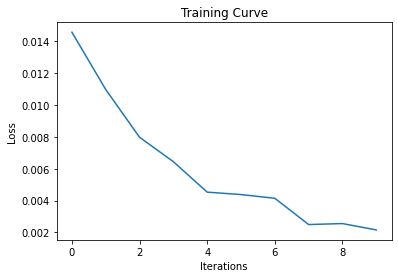

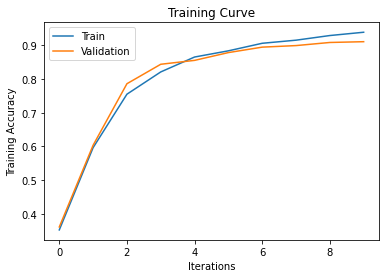

Final Training Accuracy: 0.9381088825214899
Final Validation Accuracy: 0.9101382488479263


In [26]:
use_cuda = True

model = AlexNetModel()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_alex(model, opt = optim.Adam, batch_size = 128, learning_rate=0.001, epochs=10)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [27]:
model = AlexNetModel()
model = torch.load('/content/AlexNetModel_128_0.001_10')

test_loader_alex = torch.utils.data.DataLoader(test_data_alex, batch_size=1)

print("Final Testing Accuracy: {}".format(get_accuracy(model, test_loader_alex)))

Final Testing Accuracy: 0.8928571428571429


The test accuracy has a significant improvement and reaches 89% in comparison to 72% without transfer learning.

### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [29]:
save_alex_featured_imgs(dst_dataset_dir = 'AlexNet_small/', target_dataset_dir = 'self')

In [30]:
self_data_alex = torchvision.datasets.DatasetFolder(root='/content/AlexNet_small/', loader=torch.load, extensions=('.pt'))
self_loader_alex = torch.utils.data.DataLoader(self_data_alex, batch_size=1)

### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [32]:
print("Final Testing Accuracy: {}".format(get_accuracy(model, self_loader_alex)))

Final Testing Accuracy: 0.8518518518518519


The test accuracy for my own hand gestures is still high as 85%, but not as high as 89% in Part4(d). It maybe caused by bias-variance trade-off. Since the model was trained on a larger dataset than my own hand gesture dataset, more bias is shown on the small dataset. As a result, the model performs better on large dataset with low variance.

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [33]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

[NbConvertApp] Converting notebook LAB_2_Hand_Gesture_Recognition.ipynb to html
[NbConvertApp] Writing 656205 bytes to LAB_2_Hand_Gesture_Recognition.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus